# Statistics: The Science of Decisions 

## June 2017, by Jude Moon
<br />

# Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color='red'>RED</font>, <font color='blue'>BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color='green'>PURPLE</font>, <font color='purple'>ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

# Q&A for Investigation

## 1. What is our independent variable? What is our dependent variable?

Our independent variable is words condition whether congruent or incongruent words conditions, and our dependent variable is time duration (in second) to answer the color of the ink.

## 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

A hypothesis (H<sub>A</sub>) can be whether there is a difference between the time taken to answer the color of the ink under congruent words and incongruent words condition. In this case, two-sided student t-test can be used to test the hypothesis. 
- H<sub>A</sub>: difference != 0 
- H<sub>0</sub>: difference = 0

Another hypothesis (HA), more specifically, can be whether the time taken to answer the color of the ink under incongruent words condition icos greater than that under congruent words condition. Based on my Stroop task results and statistics shown at the end of the task, this hypothesis can be made. In this case, one-sided student t-test can be used. 
- H<sub>A</sub>: difference (Time<sub>Incon</sub> -Time<sub>Con</sub> ) > 0
- H<sub>0</sub>: difference (Time<sub>Incon</sub> -Time<sub>Con</sub> ) ≤ 0

## 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import t
%matplotlib inline

# load the data set
df = pd.read_csv('./stroopdata.csv')

In [2]:
# summary statistics
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


## 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Overall, time taken to answer for incongruent words condition was longer than that for congruent words condition. The median of time taken for incongruent condition was 21 sec and the time was distributed from 16 to 35 sec. Whereas the median of time for congruent condition was 14 sec, the time was distributed from 9 to 22 sec. However, some data points were overlapping time range between 15 and 20 sec and taken account of the variability, it is hard to conclude that the time taken for incongruent condition was significantly different or longer compared to that for congruent condition.  

C:\Users\4jude\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


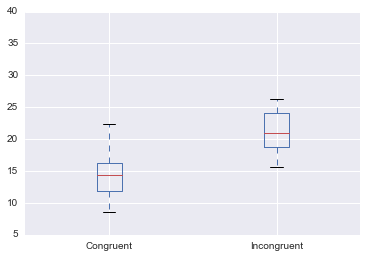

In [3]:
# create a boxplot
df.boxplot(column=['Congruent', 'Incongruent'])
plt.show()

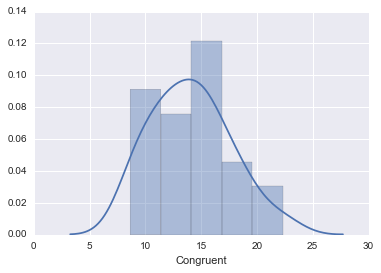

In [4]:
# create a histogram for congruent
sns.distplot(df['Congruent'])

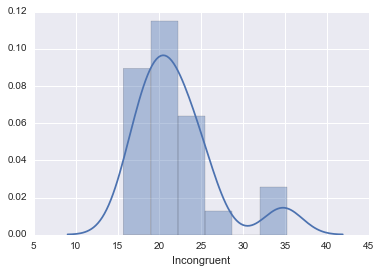

In [5]:
# create a histogram for incongruent
sns.distplot(df['Incongruent'])

## 5-1. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? 

I use 95% confidence level.

In [6]:
# get degree of freedom
print "degree of freedom: %i" %(len(df)-1)

degree of freedom: 23


In [7]:
# get t-criticl value for 95% confidence level and 23 degree of freedom
print "t-critical value for two tails: +/- %f" %t.ppf(.975, 23)
print "t-critical value for one tail: %f" %t.ppf(.95, 23)

t-critical value for two tails: +/- 2.068658
t-critical value for one tail: 1.713872


## 5-2. Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [8]:
# create colum of difference 
df['Difference'] = df['Incongruent'] - df['Congruent'] 

# one sample t-test
stats.ttest_1samp(df['Difference'], 0.0)

Ttest_1sampResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

### Are the time durations taken to answer for congruent and incongruent conditions different?
- H<sub>A</sub>: difference != 0 
- H<sub>0</sub>: difference = 0

Yes. The t-statistic (8.02) is greater than two-tailed critical t-value (2.07). We reject the null hypothesis (H<sub>0</sub>). Thus, we can conclude that the two conditions significantly differently affected the time taken to answer. 

### Is the time taken to answer for incongruent condition longer than that for congruent condition?
- H<sub>A</sub>: difference (Time<sub>Incon</sub> -Time<sub>Con</sub> ) > 0
- H<sub>0</sub>: difference (Time<sub>Incon</sub> -Time<sub>Con</sub> ) ≤ 0

Yes. The t-statistic (8.02) is greater than one-tailed critical t-value (1.71). We reject the null hypothesis (H<sub>0</sub>). Thus, we can conclude that people in the sample took significantly longer to answer the color of ink under incongruent condition compared to congruent condition.

The result from the experiment was consistent to what I expected. Generally, it takes longer to answer the color of ink under the incongruent word condition.

***
# Sources:
- change font color in markdown: https://stackoverflow.com/questions/19746350/how-does-one-change-color-in-markdown-cells-ipython-jupyter-notebook
- write subscript in markdown: https://stackoverflow.com/questions/15155778/superscript-in-markdown-github-flavored
- one sample t test: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html